# Lab 1

- Họ tên: Kim Minh Thắng
- Mã số sinh viên: B2007210

## Bài 1

### Yêu cầu

Xây dựng mô hình:
- 1 Tầng (Dense) gồm 1 neuron
- input_shape: (4,)
- use_bias: `True`
- activation: `sigmoid`

Biên dịch mô hình:
- optimizer = `adam`
- loss: `binary_crossentropy`
- metrics: `['accuracy']`

### Bài làm

#### Đọc và xử lý dữ liệu

Load dữ liệu từ file `Iris.csv` và giữ lại 100 dòng đầu tiên.

In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv("./Iris.csv")

In [35]:
df = df.head(100)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


Tách các cột đặc trưng và nhãn

In [36]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.asarray(X)

Chuyển nhãn về dạng số

In [37]:
d = dict()
d['Iris-setosa'] = 0
d['Iris-versicolor'] = 1

Y = df['Species']
Y = [d[y] for y in Y]
Y = np.asarray(Y)

Tách dataset thành dữ liệu train và test với tỉ lệ `80:20`

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#### Tạo model và biên dịch

In [40]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Train model

In [41]:
his = model.fit(X_train, Y_train, epochs=150, batch_size=20, validation_data=(X_test, Y_test), verbose=0)

#### Đánh giá model

In [42]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [43]:
print('Loss: ', score[0])
print('Accuracy: ', score[1])

Loss:  0.25047197937965393
Accuracy:  1.0


In [44]:
import matplotlib.pyplot as plt

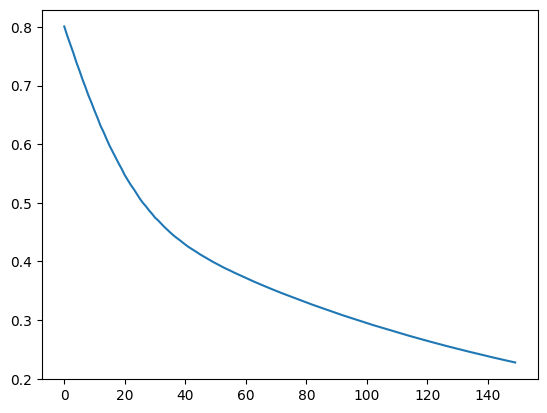

In [45]:
plt.plot(his.history['loss'])

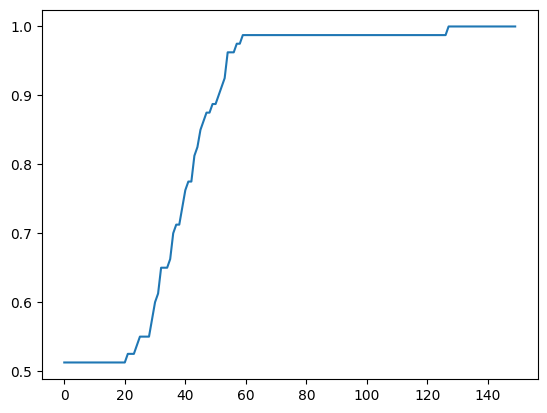

In [46]:
plt.plot(his.history['accuracy'])

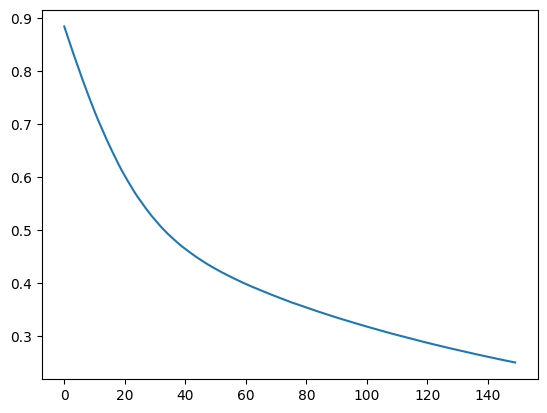

In [47]:
plt.plot(his.history['val_loss'])

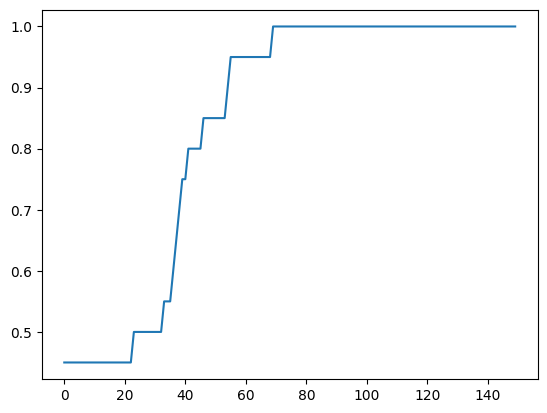

In [48]:
plt.plot(his.history['val_accuracy'])

## Bài 2

### Yêu cầu

Xây dựng mô hình:
- 1 Tầng (Dense) gồm 3 neuron
- input_shape: (4,)
- use_bias: `True`
- activation: `softmax`

Biên dịch mô hình:
- optimizer = `adam`
- loss: `square_categorical_crossentropy`
- metrics: `['accuracy']`

### Bài làm

#### Đọc và xử lý dữ liệu

Load dữ liệu từ file `Iris.csv`

In [53]:
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv("./Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Tách các cột đặc trưng và nhãn

In [55]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.asarray(X)

In [56]:
d = dict()
d['Iris-setosa'] = 0
d['Iris-versicolor'] = 1
d['Iris-virginica'] = 2

Y = df['Species']
Y = [d[y] for y in Y]
Y = np.asarray(Y)

Tách dataset thành dữ liệu train và test với tỉ lệ `80:20`

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#### Tạo model và biên dịch

In [67]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Train model

In [68]:
his = model.fit(X_train, Y_train, epochs=150, batch_size=20, validation_data=(X_test, Y_test), verbose=0)

#### Đánh giá model

In [69]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [71]:
print('Loss: ', score[0])
print('Accuracy: ', score[1])

Loss:  0.7074060440063477
Accuracy:  0.800000011920929


In [72]:
import matplotlib.pyplot as plt

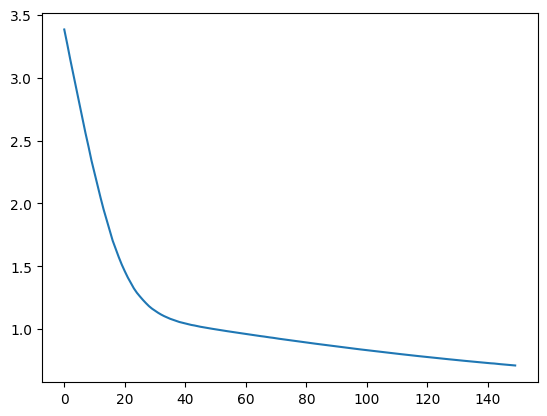

In [73]:
plt.plot(his.history['loss'])

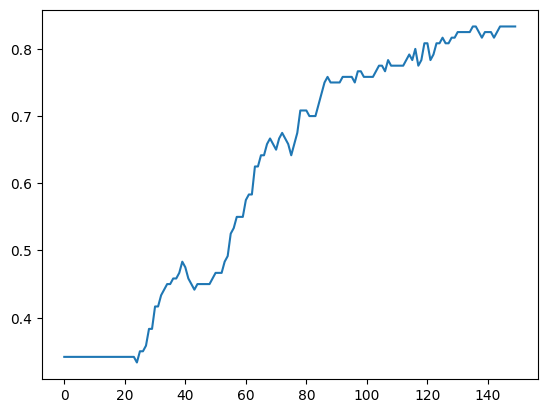

In [74]:
plt.plot(his.history['accuracy'])

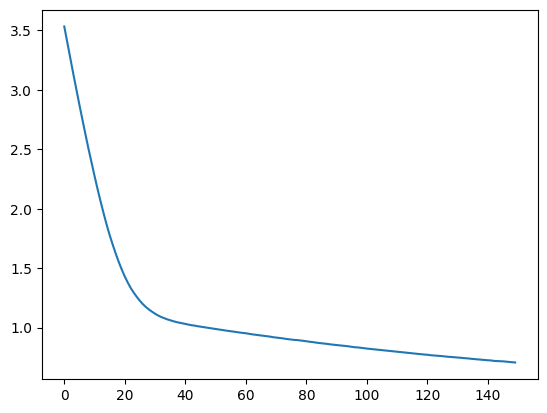

In [75]:
plt.plot(his.history['val_loss'])

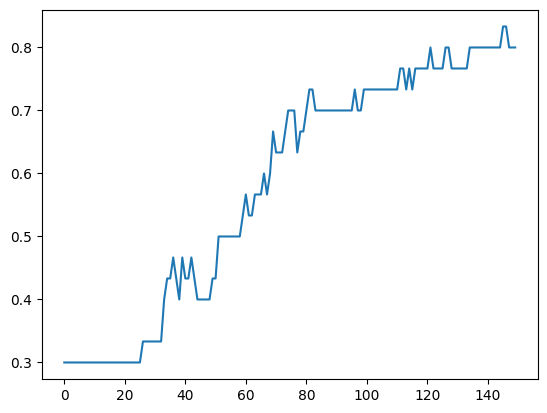

In [76]:
plt.plot(his.history['val_accuracy'])